## **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

## 3. Interpolation and Blending

 Importing necessary libraries/modules and functions

In [4]:
% matplotlib inline
% pprint off


# Import the library as show images, plot, etc.
import matplotlib.pyplot as plt
# Import functionality for the color map
import matplotlib.cm as cm

# Import system specific parameters and function
import sys 

## Other plotting libraries
# import seaborn as sns

# Import the library to mange the matrix and array 
import numpy as np

# Importing image processing toolbox 
## Module to read, write,... 
from skimage import io
## Module to convert the image on 8 bits
from skimage import img_as_ubyte
## Module to convert the image to float
from skimage import img_as_float
## Module for color conversion 
from skimage import color
## Module image transform from skimage for resize 
from skimage import transform
## Module misc from scipy for resize 
from scipy import misc
## Module util from skimage 
from PIL import Image

from pylab import subplot

from skimage.color import rgb2gray


Pretty printing has been turned ON


### 3.1  Resizing an image size using different interpolation functions

** Q.1 Resize the `lena` or `vibot` image using nearest, bilinear and bicubic function.** 

You can define your function which accept the model and resize size from the user or just run a script.

In [100]:
img_path = "./images/"
img_name = "vibot-color.jpg"
myImage = io.imread(img_path.__add__(img_name))
resize_nearest = misc.imresize(myImage, 30, 'nearest')
resize_bilinear = misc.imresize(myImage, 30, 'bilinear')
resize_bicubic = misc.imresize(myImage, 30, 'bicubic')

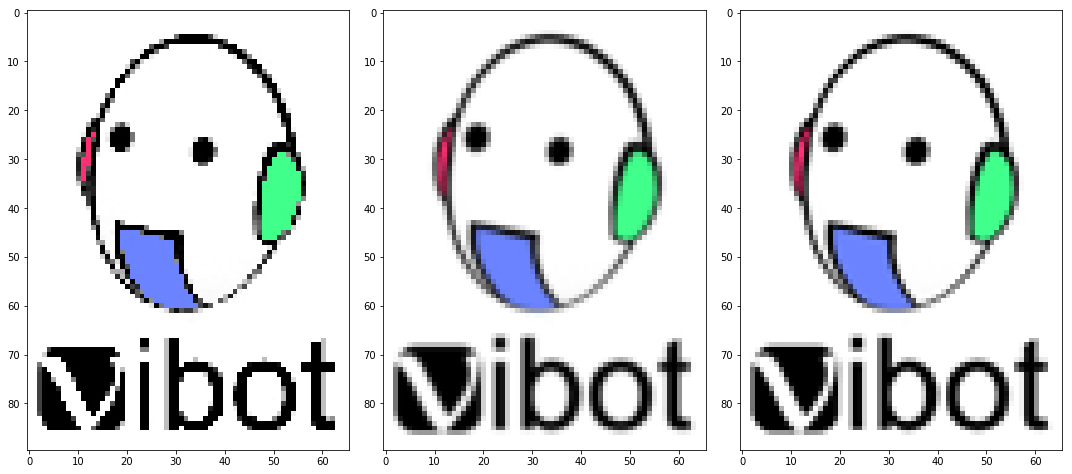

In [101]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))
subplot(1,3,1)
io.imshow(resize_nearest)
subplot(1,3,2)
io.imshow(resize_bilinear)
subplot(1,3,3)
io.imshow(resize_bicubic)

**Q.2 Write three functions that performs `simple_blend`, `alpha_blend` and `pyramid_blend`**

** Using your functions, blend `orange` and `apple` images together.**


In [196]:
def simple_blend (image1, image2):
    height, width, depth = image1.shape
    blended = np.zeros_like(image1)
    middle = (np.ceil(width/2).astype('ubyte'))
    blended[:,:middle] = image1[:,:middle]
    blended[:,middle:width] = image2[:,middle:width]
    return blended

def alpha_blend (image1, image2, window):
    image1 = img_as_float(image1)
    image2 = img_as_float(image2)
    height, width, depth = image1.shape
    middle = np.ceil(width/2).astype('ubyte')
    alpha = np.arange(0,window*2)/(window*2-1)
    blended = np.zeros_like(image1)
    alpha_matrix = np.zeros_like(image1)
    for i in range (0,height):
        for j in range (middle-window,middle+window):
            alpha_matrix[i,j] = alpha[j-(middle-window)]
    for i in range (0, height):
        for j in range (middle+window,width):
            alpha_matrix[i,j] = 1            
    blended[:,:middle-window] = image1[:,:middle-window]
    blended[:,middle+window:width] = image2[:,middle+window:width]
    blended = image1 * alpha_matrix + (1 - alpha_matrix) * image2
    return blended

def pyramid_blend (image1, image2):
    
    # Calculating laplacian pyramids for image 1
    l0, l1, l2, l3 = transform.pyramid_laplacian(image1, 3)
   
    mask = np.zeros_like(image1) # Creating the mask for the first image with 1 on the left side and 0 on the right
    for i in range (0, 300):
        for j in range (0, 150):
            mask[i,j] = 1
    
    m0, m1, m2, m3 = transform.pyramid_gaussian(mask, 3) # Getting gaussian pyramids for the mask
    
    al0 = l0 * m0 # Calculating the product between each level of the laplacian pyramids and respectives gaussian masks
    al1 = l1 * m1
    al2 = l2 * m2
    al3 = l3 * m3

  # Calculating laplacian pyramids for image 2 - same proccess
    
    l0, l1, l2, l3 = transform.pyramid_laplacian(image2, 3)
    
    mask = np.zeros_like(image1) # Creating the mask for the first image with 0 on the left side and 1 on the right
    for i in range (0, 300):
        for j in range (151, 300):
            mask[i,j] = 1
            
    m0, m1, m2, m3 = transform.pyramid_gaussian(mask, 3)
    
    ol0 = l0 * m0
    ol1 = l1 * m1
    ol2 = l2 * m2
    ol3 = l3 * m3
    
    # Summing each level of the pyramid for images 1 and 2
    
    bl0 = al0 + ol0
    bl1 = al1 + ol1
    bl2 = al2 + ol2
    bl3 = al3 + ol3

    blend = (bl0, bl1, bl2, bl3)

    # Collapsing the blended pyramid
    
    blended = blend[3]  
    for i in range(2, -1, -1):
        blended = transform.pyramid_expand(blended) 
        if blended.shape > blend[i].shape:
            blended = np.delete(blended, (-1), axis = 0)
            blended = np.delete(blended, (-1), axis = 1)  
        blended = blended + blend[i]

    # blended = misc.imresize((misc.imresize((misc.imresize(bl3,(75,75))/256 + bl2),(150,150))/256 + bl1),(300,300))/256 + bl0

    return blended

In [197]:
img_path = "./images/"
img_name = "apple.jpeg"
myApple = io.imread(img_path.__add__(img_name))

img_name = "orange.jpeg"
myOrange = io.imread(img_path.__add__(img_name))

mySimpleBlend = simple_blend (myApple, myOrange)
myAlphaBlend = alpha_blend (myApple, myOrange, window=100)

img_name = "apple.jpeg"
myApple = io.imread(img_path.__add__(img_name))
myApple = rgb2gray(myApple) 
img_name = "orange.jpeg"
myOrange = io.imread(img_path.__add__(img_name))
myOrange = rgb2gray(myOrange)
myPiramidBlend = pyramid_blend (myApple, myOrange)

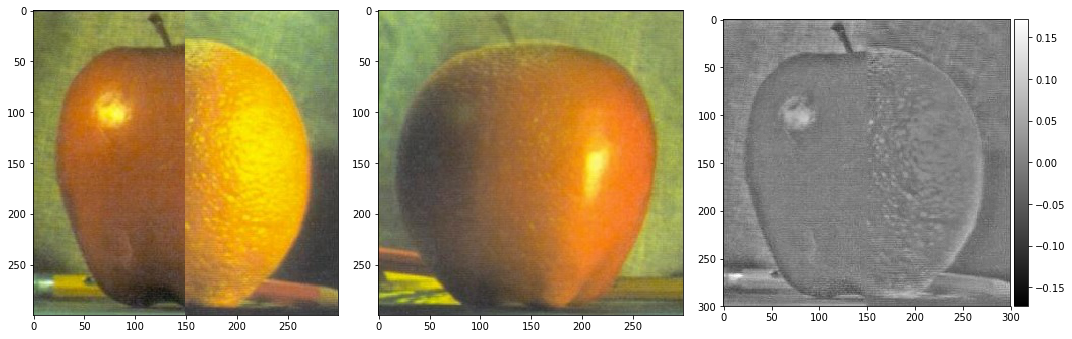

In [198]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))
subplot(1,3,1)
io.imshow(mySimpleBlend)
subplot(1,3,2)
io.imshow(myAlphaBlend)
subplot(1,3,3)
io.imshow(myPiramidBlend, cmap = cm.gray)